Epoch [20/100], Loss: 0.2770
Epoch [40/100], Loss: 0.2387
Epoch [60/100], Loss: 0.0480
Epoch [80/100], Loss: 0.1222
Epoch [100/100], Loss: 0.1583


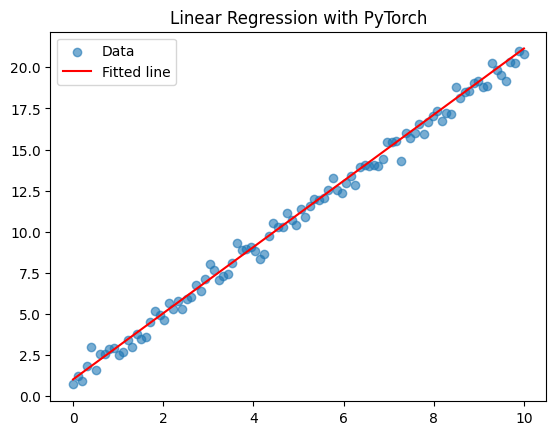

Learned weight: 2.012958526611328
Learned bias: 1.0161267518997192


In [2]:
##linear regression example

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt
# 1️⃣ Generate sample data (y = 2x + 1)
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + torch.randn(X.size()) * 0.5  # add small noise

dataset=TensorDataset(X,y)
loader=DataLoader(dataset,batch_size=10,shuffle=True)

model=nn.Linear(in_features=1,out_features=1)

loss_fn=nn.MSELoss()
optim=torch.optim.SGD(model.parameters(),lr=0.01)

losses=[]
for epoch in range(100):
    for xb,yb in loader:
        pred=model(xb)
        loss=loss_fn(pred,yb)
        loss.backward()
        optim.step()
        optim.zero_grad()
    losses.append(loss.item())

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# 6️⃣ Visualize results
plt.scatter(X, y, label='Data', alpha=0.6)
plt.plot(X, model(X).detach(), color='red', label='Fitted line')
plt.legend()
plt.title("Linear Regression with PyTorch")
plt.show()

print("Learned weight:", model.weight.item())
print("Learned bias:", model.bias.item())

LOGISTIC REGRESSION

Epoch [20/100], Loss: 0.4520
Epoch [40/100], Loss: 0.3587
Epoch [60/100], Loss: 0.3076
Epoch [80/100], Loss: 0.2744
Epoch [100/100], Loss: 0.2505


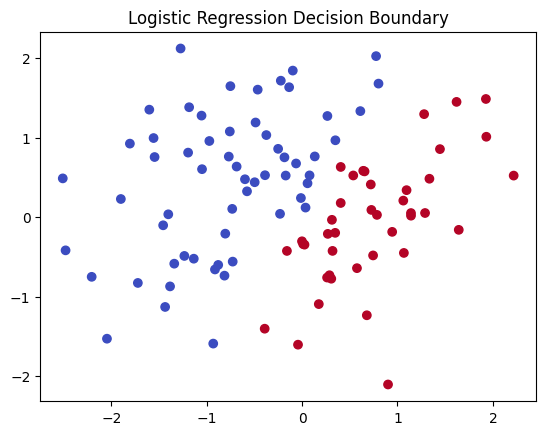

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1️⃣ Create simple 2D dataset
torch.manual_seed(42)
X = torch.randn(100, 2)
y = (X[:, 0] * 2 + X[:, 1] * -1 > 0).float().unsqueeze(1)

# 2️⃣ Define model
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

# 3️⃣ Loss and optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 4️⃣ Train the model
for epoch in range(100):
    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# 5️⃣ Plot decision boundary
with torch.no_grad():
    plt.scatter(X[:, 0], X[:, 1], c=(pred > 0.5).squeeze(), cmap='coolwarm')
    plt.title("Logistic Regression Decision Boundary")
    plt.show()


📘 Overview:
On Day 2, I learned how to implement Linear and Logistic Regression models from scratch using PyTorch.
This included understanding how the forward pass, loss computation, backward propagation, and optimizer steps work inside a typical machine learning training loop.

🧠 Concepts Covered:

Building a Linear Regression model with nn.Linear

Using MSELoss for continuous prediction tasks

Implementing a Logistic Regression classifier using Sigmoid activation

Applying BCELoss for binary classification

Understanding gradient descent, learning rate, and epoch-based optimization

Visualizing results: regression line & decision boundary

⚙️ Key Code Components:

nn.Linear — model definition

torch.optim.SGD — optimizer for parameter updates

loss.backward() — computing gradients

optimizer.step() and optimizer.zero_grad() — updating weights

📊 Results:

Linear regression successfully learned a near-perfect line for the relation y = 2x + 1.

Logistic regression produced a clean decision boundary separating two classes visually.

Observed decreasing loss values and improved predictions over epochs.

🧩 Files:

File	Description
day2_linear_logistic_regression.ipynb	Notebook implementing both regression models
linear_regression_plot.png	Visualization of linear model fit
logistic_regression_boundary.png	Visualization of logistic model decision boundary

✨ Takeaway:
Day 2 built the foundation for understanding how deep learning models are trained — moving from simple equations to trainable models with gradients and optimization.